In [6]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [7]:
col = ["num_preg", "plasma_glucose_conc", "D_blood_pressure", "skin_fold_thickness", "serum_insulin", "body_mass_index", "pedigree_func", "age", "diabetes"]
diabetes_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/ML_Models/master/Performance_Evaluation/diabetes.txt", names = col)
diabetes_data

,num_preg,plasma_glucose_conc,D_blood_pressure,skin_fold_thickness,serum_insulin,body_mass_index,pedigree_func,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
diabetes_data.isnull().sum()

num_preg               0
plasma_glucose_conc    0
D_blood_pressure       0
skin_fold_thickness    0
serum_insulin          0
body_mass_index        0
pedigree_func          0
age                    0
diabetes               0
dtype: int64

In [9]:
diabetes_data.describe()

,num_preg,plasma_glucose_conc,D_blood_pressure,skin_fold_thickness,serum_insulin,body_mass_index,pedigree_func,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


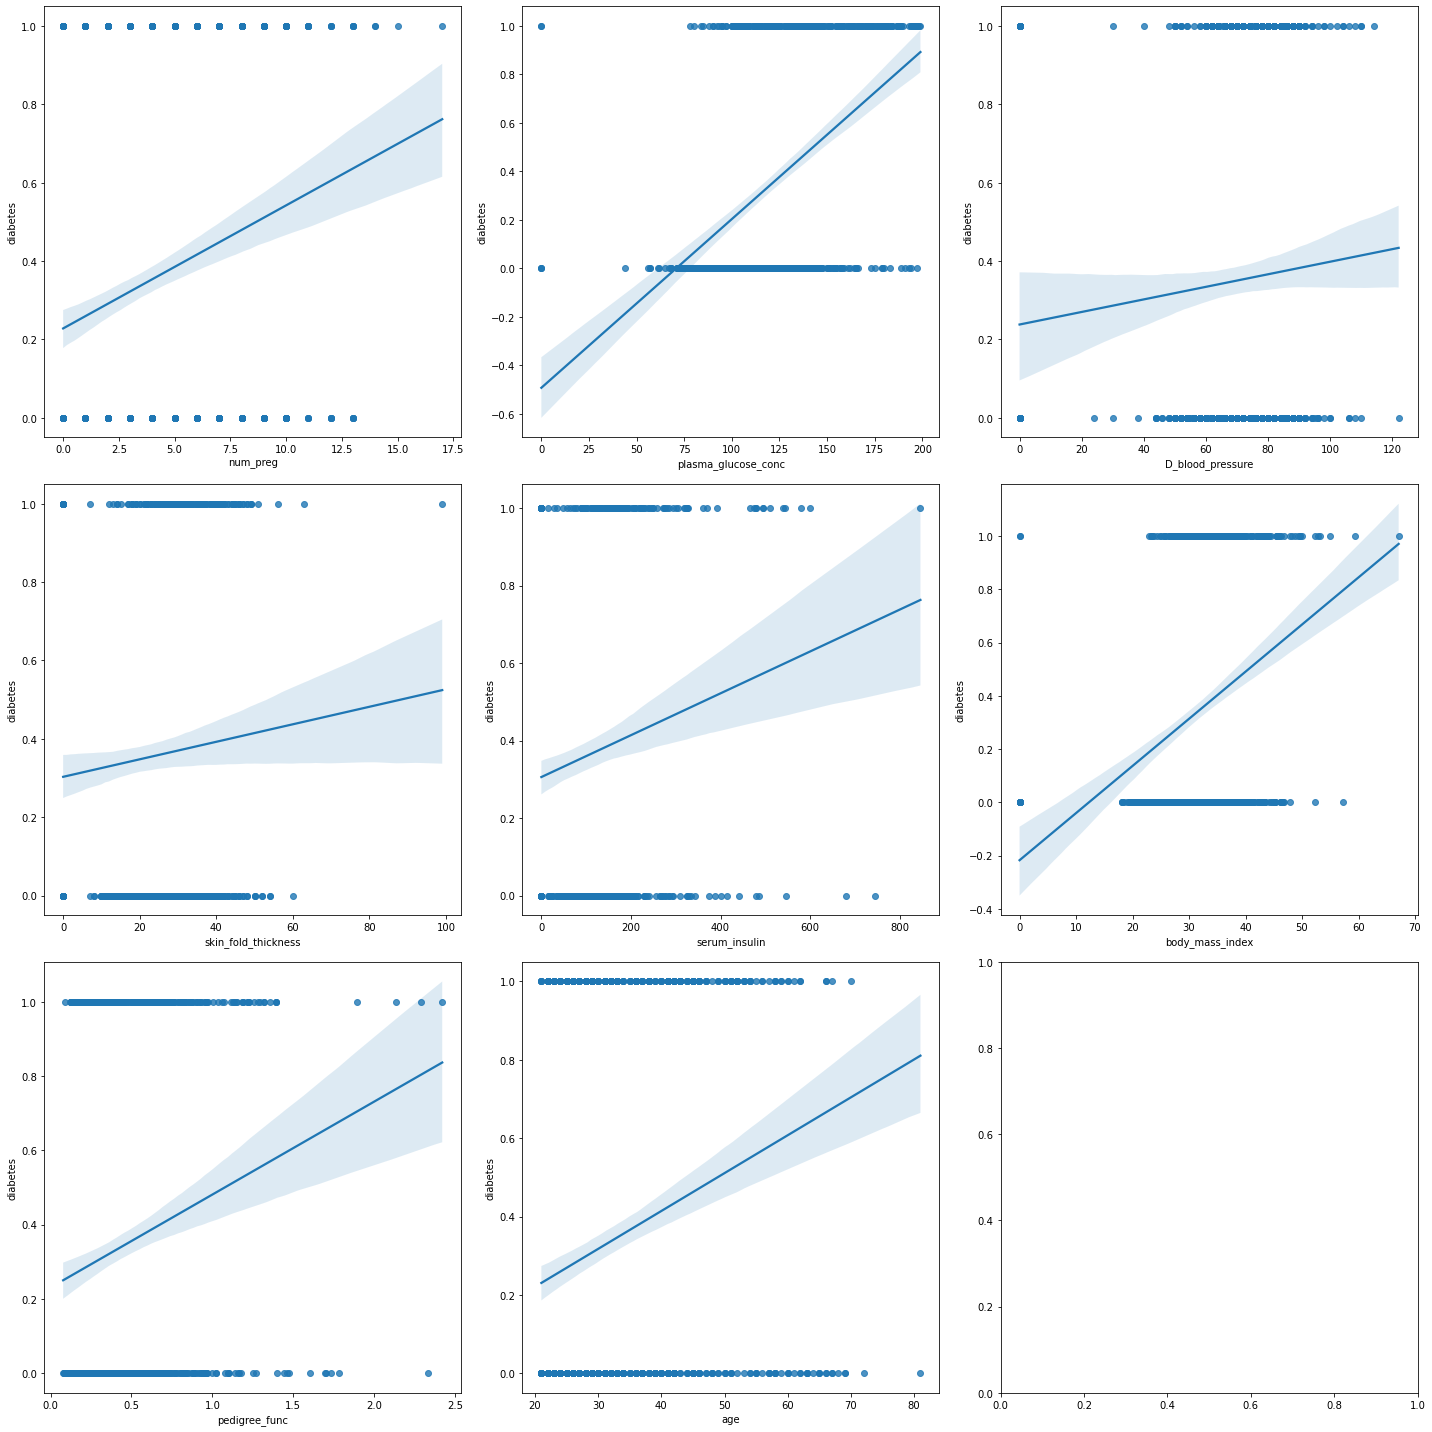

In [12]:
fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (20, 20))
sns.regplot(y = diabetes_data['diabetes'], x = diabetes_data['num_preg'], ax = axs[0, 0])
sns.regplot(y = diabetes_data['diabetes'], x = diabetes_data['plasma_glucose_conc'], ax = axs[0, 1])
sns.regplot(y = diabetes_data['diabetes'], x = diabetes_data['D_blood_pressure'], ax = axs[0, 2])
sns.regplot(y = diabetes_data['diabetes'], x = diabetes_data['skin_fold_thickness'], ax = axs[1, 0])
sns.regplot(y = diabetes_data['diabetes'], x = diabetes_data['serum_insulin'], ax = axs[1, 1])
sns.regplot(y = diabetes_data['diabetes'], x = diabetes_data['body_mass_index'], ax = axs[1, 2])
sns.regplot(y = diabetes_data['diabetes'], x = diabetes_data['pedigree_func'], ax = axs[2, 0])
sns.regplot(y = diabetes_data['diabetes'], x = diabetes_data['age'], ax = axs[2, 1])
plt.tight_layout()

In [13]:
X = diabetes_data.drop('diabetes', axis = 1)
y = diabetes_data.diabetes

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [15]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[68, 24],
       [21, 41]])

In [18]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 41
True Negative 68
False Positive 24
False Negative 21


In [19]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.7077922077922078

In [20]:
#recall/sensitivity
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.6612903225806451

In [21]:
#specifity
print("Specificity with recall pos label=0: ",recall_score(y_test, y_pred, pos_label=0))

print("Specificity with Formulas: ", tn/(tn+fp))

Specificity with recall pos label=0:  0.7391304347826086
Specificity with Formulas:  0.7391304347826086


In [22]:
#precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.6307692307692307

In [23]:
#precision
tp / (tp + fp)

0.6307692307692307

In [24]:
#imbalanced dataset
diabetes_data.iloc[:,-1].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [25]:
#Matthews correlation Coefficient
from sklearn.metrics import matthews_corrcoef
print("MCC Score: ",matthews_corrcoef(y_test, y_pred))

MCC Score:  0.39760758394031886


In [26]:
from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_test, y_pred))

F1 Score:  0.6456692913385826


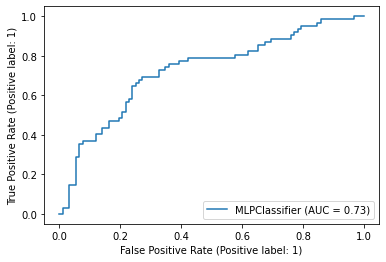

In [27]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(mlp, x_test, y_test)
plt.show()